In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import spikeinterface as si

/usr/itetnas04/data-scratch-01/kvulic/data/conda_envs/spikesort/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
job_kwargs = dict(n_jobs=6, chunk_duration='1s', progress_bar=True)
freq_min=200
freq_max=None

In [3]:
filename = 'ID1731_N5_DIV28_DATE20240502_1133_spontaneous_CTRL.raw.h5'

In [ ]:
MAIN_PATH = '/itet-stor/kvulic/neuronies/TANGO2/Kate/'
RECORDING_PATH = os.path.join(MAIN_PATH, f'TEST/{filename}')
SORTER_PATH = os.path.join(MAIN_PATH, f'Sorters_2/Sorter_{filename}')
analyzer = si.load_sorting_analyzer(os.path.join(SORTER_PATH, 'analyzer_curated'))


In [ ]:
def find_representative_waveform(wf, num_channels):
    for i in range(15):
        plt.figure()
        for j in range(len(wf[:, :, i])):
            plt.plot(wf[j, :, i], color='grey', alpha=0.5)
        
        avg_waveform = np.mean(wf[:, :, i], axis=0)
        plt.plot(avg_waveform, color='red', linewidth=2)
        plt.title(f'Index {i}')
        plt.show()

    # Find the shape where the negative peak is most in the center of the x-axis
    center_index = wf.shape[1] // 2
    min_distance = float('inf')
    best_shape_index = -1

    for i in range(num_channels):
        avg_waveform = np.mean(wf[:, :, i], axis=0)
        negative_peak_index = np.argmin(avg_waveform)
        distance_to_center = abs(negative_peak_index - center_index)
        
        if distance_to_center < min_distance:
            min_distance = distance_to_center
            best_shape_index = i

    print(f'The shape where the negative peak is most in the center of the x-axis is at index {best_shape_index}')
    

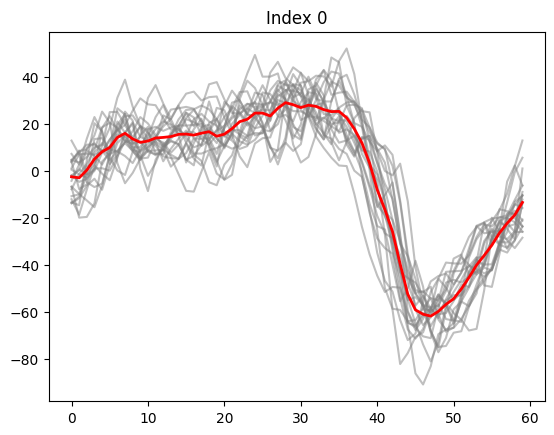

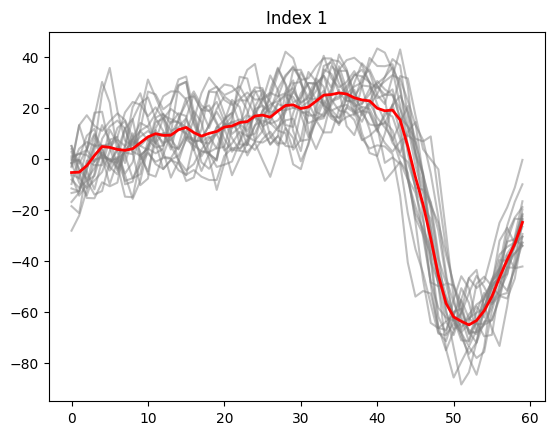

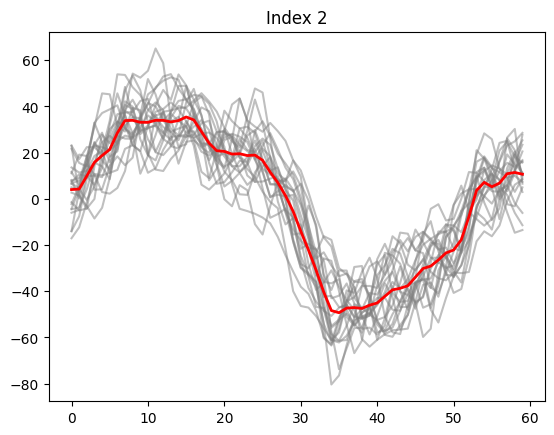

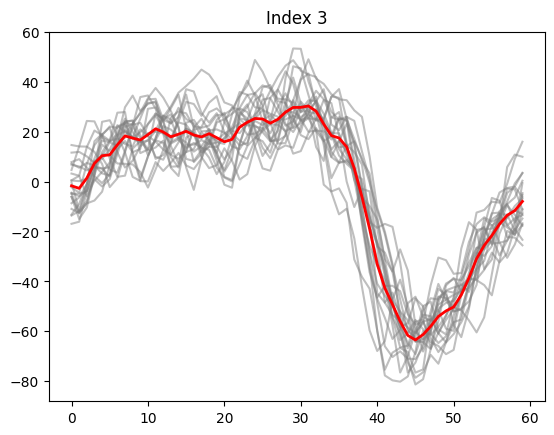

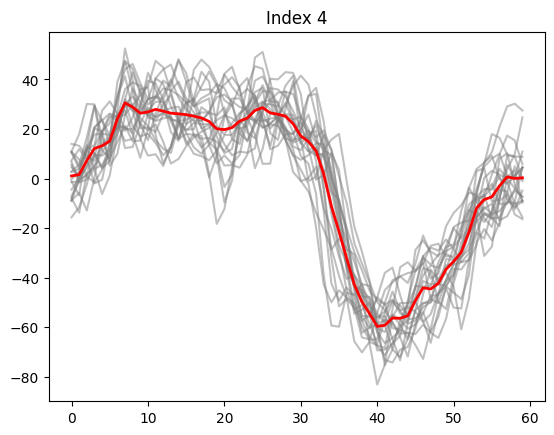

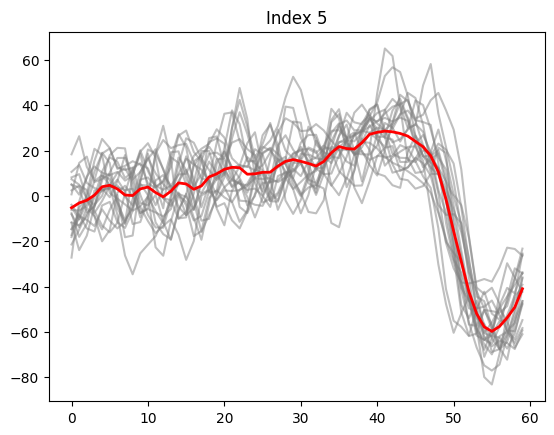

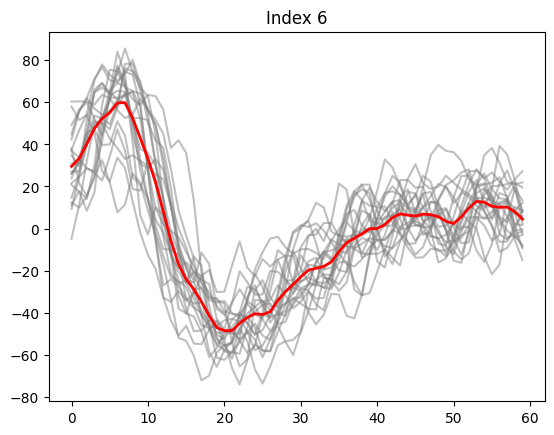

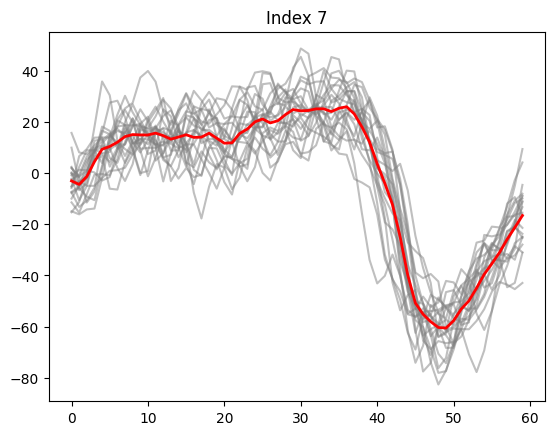

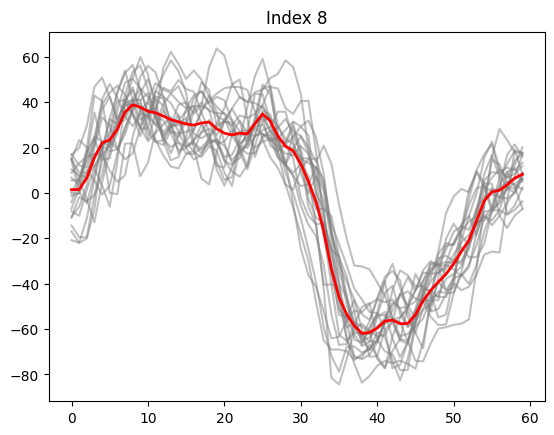

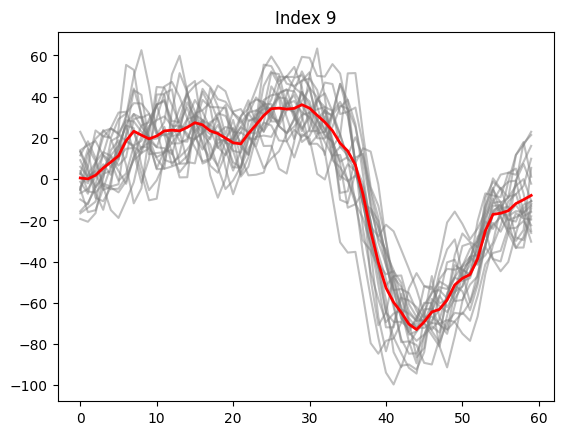

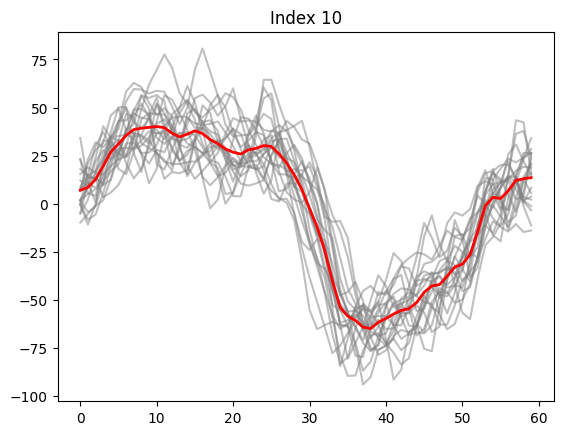

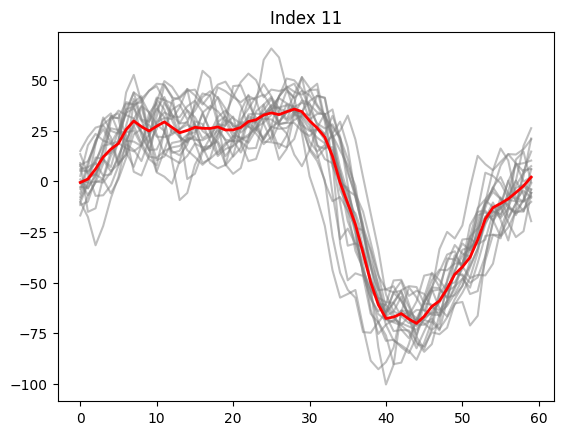

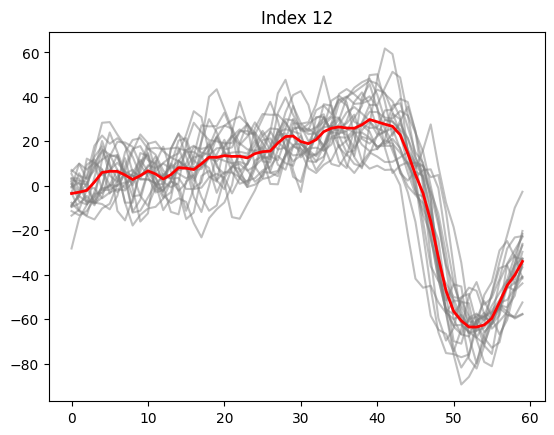

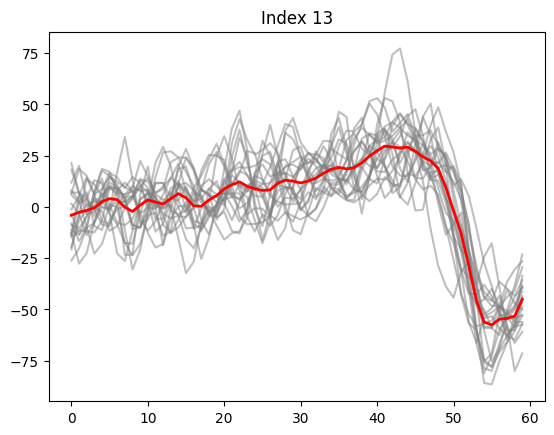

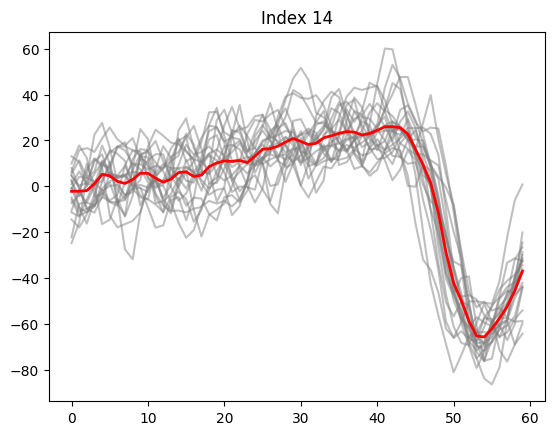

The shape where the negative peak is most in the center of the x-axis is at index 2


In [56]:
unit_ids = analyzer.unit_ids
waveforms = analyzer.get_extension('waveforms')
find_representative_waveform(waveforms.get_waveforms_one_unit(unit_id=unit_ids[0]),15)